# Analyze Work Place Satisfaction Survey Data

This notebook walks through an analysis of work palce satisfaction survey data. The data includes various demographic variables (like age, gender, family and education), as well assalary, sat_management, and more. We'll perform data cleaning, explore descriptive statistics, visualize the data, and examine the relationships between variables using cross-tabulation and hypothesis testing 

## Goals of the analysis:

1. Descriptive statistical analysis: Understand the basic distribution of data; analyze the distribution of missing values ​​and process these data.
2. Vi
3. Test 
4. fff

In [259]:
%pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [260]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Initial Exploration

In this section, we load the data and take an initial look at the dataset to understand its structure and contents.

In [262]:
# Pandas uses openpyxl to read Excel files.
%pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [263]:
# Open the data
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')
df.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


## Data Cleaning

Before the analysis, we clean the data. 
1. Drop unnecessary columns.
2. Check for missing values.


In [264]:
df.isnull().sum()

number                     0
gender                     0
age                        0
family                     0
education                  1
years_of_service           2
salary                     0
sat_management             0
sat_colleques              1
sat_workingEnvironment     0
sat_salary                 0
sat_tasks                  0
healtcare                 35
holidayCabin              62
gym                       73
muscleCare                60
dtype: int64

In [265]:
# Drop unnecessary columns (like 'for columns: unmber,healthcare,holidayCabin,gym,muscleCare')
df = df.drop(['number','healtcare','holidayCabin','gym','muscleCare'],axis=1)
df.head()


,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2


## Descriptive Statistics and Summary

In [266]:
# Get a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  82 non-null     int64  
 1   age                     82 non-null     int64  
 2   family                  82 non-null     int64  
 3   education               81 non-null     float64
 4   years_of_service        80 non-null     float64
 5   salary                  82 non-null     int64  
 6   sat_management          82 non-null     int64  
 7   sat_colleques           81 non-null     float64
 8   sat_workingEnvironment  82 non-null     int64  
 9   sat_salary              82 non-null     int64  
 10  sat_tasks               82 non-null     int64  
dtypes: float64(3), int64(8)
memory usage: 7.2 KB


In [267]:
# Display basic statistics for numerical columns
df.describe()

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
count,82.000000,82.000000,82.000000,81.000000,80.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000
mean,1.231707,37.951220,1.621951,1.987654,12.175000,2563.878049,3.060976,4.061728,3.219512,2.109756,3.195122
std,0.424519,9.773866,0.487884,0.844006,8.807038,849.350302,1.058155,0.826826,1.154961,1.111179,1.047502
min,1.000000,20.000000,1.000000,1.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,1.000000,31.000000,1.000000,1.000000,3.750000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000
50%,1.000000,37.500000,2.000000,2.000000,12.500000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000
75%,1.000000,44.000000,2.000000,3.000000,18.250000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000
max,2.000000,61.000000,2.000000,4.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [268]:
# Loop through variables to explore unique values:
for var in df:
    print(var, df[var].unique())


gender [1 2]
age [38 29 30 36 24 31 49 55 40 33 39 35 58 53 42 26 47 44 43 56 21 45 59 37
 28 50 32 51 22 34 27 41 25 61 20 52 46]
family [1 2]
education [ 1.  2.  3.  4. nan]
years_of_service [22. 10.  7. 14.  4. 16.  0. 23. 21. 15. 12.  2. 17. 20. 13. 27.  1.  3.
 nan 24.  5.  9.  6. 35. 28. 18. 36. 19.  8.]
salary [3587 2963 1989 2144 2183 1910 2066 2768 2106 2651 2846 2808 3393 2691
 5225 2729 2925 2457 4874 3510 4446 1521 2223 1949 2340 6278 1559 2027
 2300 2534 1872 2261 2417 3119 2574 1715 5069 2495 3470 1598 1638 2612]
sat_management [3 1 2 4 5]
sat_colleques [ 3.  5.  4.  2. nan]
sat_workingEnvironment [3 2 1 5 4]
sat_salary [3 1 2 4 5]
sat_tasks [3 2 4 1 5]


In [269]:
# Handling missing values

# education value drop the null row
df = df.dropna(subset=['education'])

# years_of_service values fill with median
df['years_of_service'] = df['years_of_service'].fillna(df['years_of_service'].median())

# sat_colleques fills with majority
df['sat_colleques'] = df['sat_colleques'].fillna(df['sat_colleques'].mode()[0])


In [270]:
# Finding the 3 longest service years respondents based on years_of_service
df.nlargest(n=3, columns='years_of_service')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
56,1,61,2,2.0,36.0,3119,2,4.0,2,1,5
44,1,55,2,1.0,35.0,2651,4,5.0,4,2,4
45,2,51,2,1.0,28.0,1989,3,3.0,2,2,3


In [271]:
# Finding the 3 shortest service years respondents based on years_of_service
df.nsmallest(n=3, columns='years_of_service')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
7,1,55,1,1.0,0.0,2066,3,5.0,3,1,3
35,1,31,2,3.0,0.0,1559,2,4.0,3,1,3
61,1,40,2,1.0,0.0,1872,2,3.0,1,2,3


In [272]:
# Finding the 3 oldest respondents based on age
df.nlargest(n=3, columns='age')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
56,1,61,2,2.0,36.0,3119,2,4.0,2,1,5
32,1,59,2,3.0,15.0,6278,4,4.0,5,4,4
13,1,58,2,3.0,21.0,3587,4,5.0,4,1,3


In [273]:
# Finding the 3 youngest respondents based on age
df.nsmallest(n=3, columns='age')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
58,1,20,1,2.0,1.0,2261,3,4.0,3,2,3
30,1,21,1,3.0,1.0,2340,4,5.0,3,4,2
46,2,22,1,3.0,21.0,1872,3,3.0,4,1,3


## Visualizations

we create some visualizations to better understand the distribution of the data. 

### Investigating Qualitative Variables and Generating Frequency Tables

In [274]:
# Investigate a few qualitative variables and generate frequency table(s) for their values
df1=pd.crosstab(df['education'], 'Count')
# Labeling the index with meaningful education categories
df1.index=['primary school','secondary school graduate','bachelor level','master level']
# Remove the name of the columns
df1.columns.name=''
df1

,Count
primary school,27
secondary school graduate,30
bachelor level,22
master level,2


### Visualizing the Education Distribution

1.we visualize the distribution using a horizontal bar chart. Bar charts are useful for comparing the sizes of different categories visually.

In [275]:
sum(df1['Count'])

81

Text(0.5, 0, 'Count, N = 81')

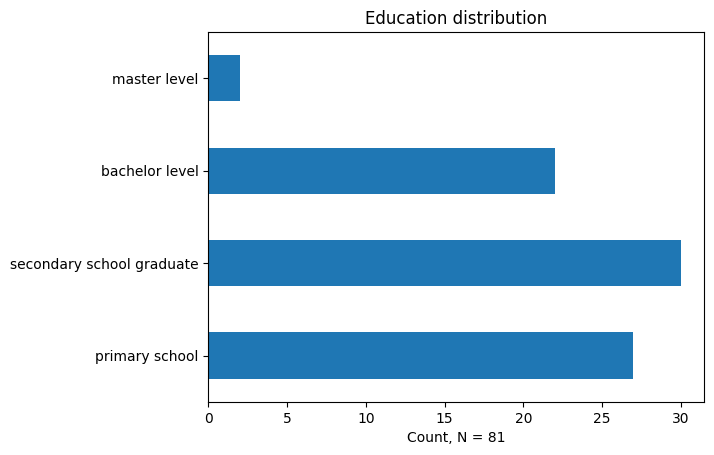

In [276]:
df1.plot.barh(legend = False)
plt.title('Education distribution')
plt.xlabel('Count, N = 81')


2. Visualizing the Education Distribution with Percentages.

In [277]:
df2 = pd.crosstab(df['education'], 'Count')
df2['percentage'] = round(df2['Count'] / df2['Count'].sum() * 100,2)
df2.index=['primary school','secondary school graduate','bachelor level','master level']
df2.columns.name = ''
df2

,Count,percentage
primary school,27,33.33
secondary school graduate,30,37.04
bachelor level,22,27.16
master level,2,2.47


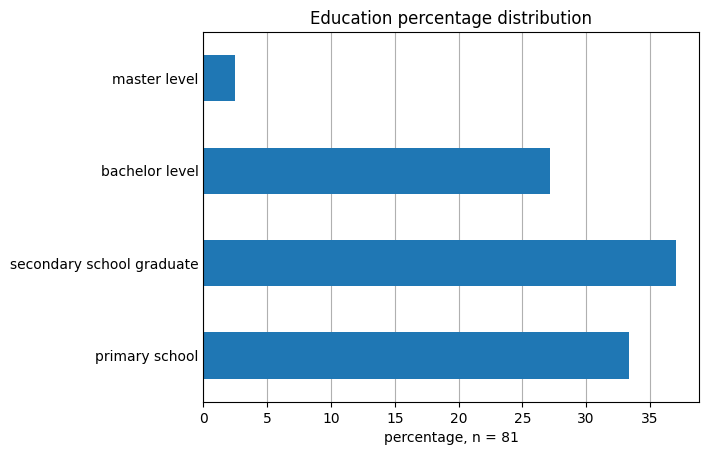

In [278]:
df2['percentage'].plot.barh(zorder = 2)
plt.title('Education percentage distribution')

plt.xlabel('percentage, n = ' + str(df2['Count'].sum()))

plt.grid(axis = 'x')
plt.tick_params(axis = 'y', length = 0)

3. Visualizing the Salary Distribution.

In [279]:
min(df['salary'])

1521

In [280]:
max(df['salary'])

6278

In [281]:
bins = [500,1000,3000,5000,6000,7000]
df['salary_class'] = pd.cut(df['salary'], bins = bins)
df.head()

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,salary_class
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,"(3000, 5000]"
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,"(1000, 3000]"
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,"(1000, 3000]"
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,"(1000, 3000]"
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,"(1000, 3000]"


In [282]:
df3 = pd.crosstab(df['salary_class'], 'Count')
df3.columns.name = ''
n = df3['Count'].sum()
# add a percentage in the df3 table
df3['percentage'] = round(df3['Count']/df3['Count'].sum() * 100,2)


In [283]:
type(df3.index.values[0])

pandas._libs.interval.Interval

In [284]:

df3.index = df3.index.astype(str)
df3.loc['Total'] = df3.sum()
df3

,Count,percentage
salary_class,,
"(1000, 3000]",68.0,83.95
"(3000, 5000]",10.0,12.35
"(5000, 6000]",2.0,2.47
"(6000, 7000]",1.0,1.23
Total,81.0,100.00


In [285]:
# Checking the Data Type of the Income Class Index
type(df3.index.values[0])

str

In [286]:
pip install Jinja2


Note: you may need to restart the kernel to use updated packages.


In [287]:
#Finalizing the layout
df3.style.format({'Count': '{:.0f}', 'percentage': '{:.1f} %'})

,Count,percentage
salary_class,,
"(1000, 3000]",68,84.0 %
"(3000, 5000]",10,12.3 %
"(5000, 6000]",2,2.5 %
"(6000, 7000]",1,1.2 %
Total,81,100.0 %


Text(0, 0.5, 'Count, n=81')

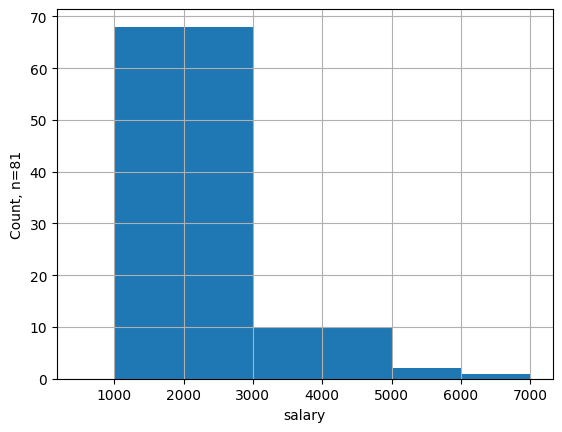

In [288]:
# Creating a Histogram for salary Distribution (Counts)
df['salary'].hist(bins = bins)
plt.xlabel('salary')
plt.ylabel('Count, n=' + str(n))

In [289]:
# relationship between salary and educations
df4 = round(pd.crosstab(df['education'], df['gender'], normalize = 'columns') * 100,2)
df4.index=['primary school','secondary school graduate','bachelor level','master level']
df4.columns = ['woman', 'man']
df4

,woman,man
primary school,35.48,26.32
secondary school graduate,37.10,36.84
bachelor level,24.19,36.84
master level,3.23,0.00


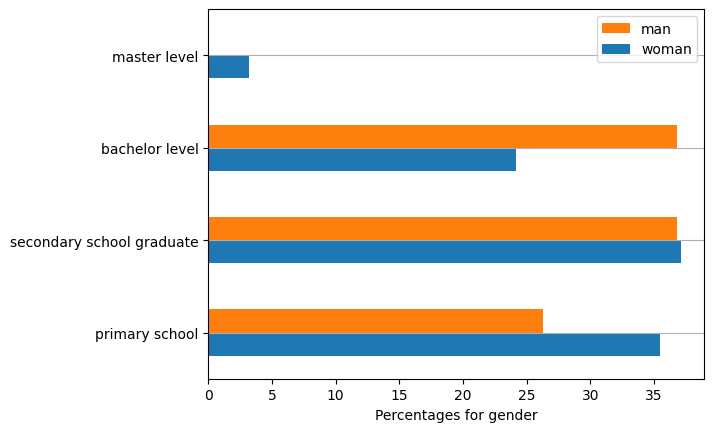

In [290]:
# A horizontal bar chart is created to visualize the percentage distribution of education levels across genders.
df4.plot.barh(legend = 'reverse')

plt.xlabel('Percentages for gender')

plt.grid(axis = 'y')

In [291]:
from scipy.stats import chi2_contingency


chi2_contingency(df4)

Chi2ContingencyResult(statistic=np.float64(7.210640196788447), pvalue=np.float64(0.06547854572010044), dof=3, expected_freq=array([[30.9  , 30.9  ],
       [36.97 , 36.97 ],
       [30.515, 30.515],
       [ 1.615,  1.615]]))

## No significant dependency between "education" and "gender".

- Since the p-value (0.065) is greater than 0.05, the result suggests that there is no significant dependency between education level and gender in this dataset.

- The observed distribution of education levels across genders is likely due to random variation and not due to a meaningful relationship.

## Analysis of the difference in  management satisfaction between men and women

In [292]:
#Extracting various satisfaction variables by gender grouping.
variable_list=['age', 'salary','years_of_service', 'sat_management','sat_colleques', 'sat_workingEnvironment', 'sat_salary', 'sat_tasks']
df5 = df.groupby('gender')[variable_list].mean()
df5.index=['men','women']
df5

,age,salary,years_of_service,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
men,37.387097,2675.274194,11.491935,2.854839,4.129032,3.000000,1.887097,3.112903
women,40.684211,2232.736842,14.421053,3.684211,3.842105,3.947368,2.789474,3.526316


<Axes: >

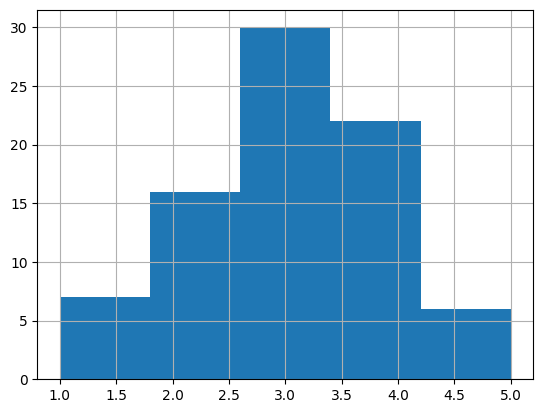

In [293]:
# check the variable is the categorical variable.
df['sat_management'].hist(bins=5)

The histogram looks much like normal distribution

In [294]:
# 1.Man and women are independent vairibles.
# 2.The sample size >30.
# 3.The value of "sat_management" are normally distributed.

# Forming the data for the groups to be compared
gender1 = df['sat_management'][df['gender'] == 1] # men
gender2 = df['sat_management'][df['gender'] == 2] # women

# Kahden riippumattoman (ind) otoksen t-testi
from scipy.stats import ttest_ind
ttest_ind(gender1, gender2, equal_var = False)  


TtestResult(statistic=np.float64(-3.5925974512124648), pvalue=np.float64(0.000927215546129314), df=np.float64(37.94426745293661))

## Difference of "sat_management" between men and women
- Since the p-value (0.000927) is lower than 0.05, so there is difference between men and women with satisfaction level to management.
